関連ライブラリを読み込む

In [ ]:
import pandas as pd
import numpy as np

TPMデータのファイルをダウンロードしてデータをデータフレーム型で抽出する。

In [ ]:
df_tpm = pd.read_excel('https://github.com/iwata97/bioinfo/raw/refs/heads/main/TPM_data.xlsx')

df_tpmの中身を確認してみる

In [ ]:
df_tpm

,gene,batch_1,batch_2,batch_3,chemostat_1,chemostat_2,chemostat_3
0,seripauperin PAU8,0.000000,0.734587,3.129839,0.000000,0.000000,0.504810
1,hypothetical protein,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,putative permease SEO1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,hypothetical protein,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,hypothetical protein,0.948490,2.799529,4.969954,4.689762,4.372026,8.657291
...,...,...,...,...,...,...,...
5978,Arr2p,9.655050,8.142143,7.227299,12.881928,13.321091,20.049815
5979,Arr3p,4.758844,6.474344,5.298830,18.627810,17.039334,13.272137
5980,hypothetical protein,7.056131,9.111649,12.940596,7.476147,11.616052,11.245221
5981,hypothetical protein,0.000000,2.588885,0.612800,1.927507,0.770107,0.593029


全てを表示すると場所を取るので、上位5行だけ表示するには、.head()を用いる。

In [ ]:
df_tpm.head()

,gene,batch_1,batch_2,batch_3,chemostat_1,chemostat_2,chemostat_3
0,seripauperin PAU8,0.00000,0.734587,3.129839,0.000000,0.000000,0.504810
1,hypothetical protein,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
2,putative permease SEO1,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
3,hypothetical protein,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
4,hypothetical protein,0.94849,2.799529,4.969954,4.689762,4.372026,8.657291


このように上位5行のみ出力される。

次に、gene列を削除する

In [ ]:
tpm = df_tpm.drop('gene', axis=1)
tpm.head()

,batch_1,batch_2,batch_3,chemostat_1,chemostat_2,chemostat_3
0,0.00000,0.734587,3.129839,0.000000,0.000000,0.504810
1,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.94849,2.799529,4.969954,4.689762,4.372026,8.657291


各サンプルにおける遺伝子発現量が得られる。このうち、batch_1を例に、発現量の分布を見てみる。.iloc[:,0]によって1列目（0から数える）のデータを見る。

In [ ]:
tpm.iloc[:,0]

,batch_1
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.948490
...,...
5978,9.655050
5979,4.758844
5980,7.056131
5981,0.000000


1列目、つまりbatch_1の5983行分の発現量が見られる。このデータを使ってヒストグラムを描いてみる。

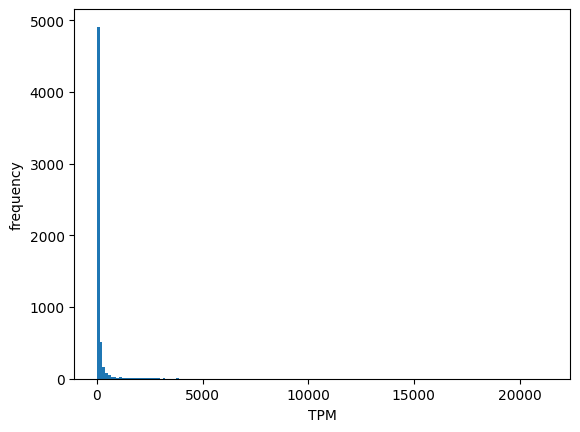

In [ ]:
import matplotlib.pyplot as plt

x = tpm.iloc[:, 0] #batch_1のTPMデータでヒストグラムを作成する。
fig = plt.figure()
ax = fig.add_subplot()
ax.hist(x, bins='scott')  # 階級の範囲の計算方法を指定する　#スコットの選択を検索
ax.set_xlabel('TPM')
ax.set_ylabel('frequency')
fig.show()

こちらが指定しないと、x軸、y軸の範囲は自動で設定される。このデータは、ばらつきの大きいデータであることがわかる。
データの最大値を最小値を出力してみる。

In [ ]:
max_value = x.max()
min_value = x.min()
print('max:', max_value)
print('min:', min_value)

max: 4.329254596166086
min: 0.0


そこで、TPM値を対数化する。TPM値が0のときは対数化でエラーがでるため、あらかじめ1.0をたしておく。

In [ ]:
log_tpm = np.log2(tpm + 1.0)
log_tpm.head()

,batch_1,batch_2,batch_3,chemostat_1,chemostat_2,chemostat_3
0,0.000000,0.794592,2.046085,0.000000,0.000000,0.589581
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.962357,1.925821,2.577720,2.508368,2.425466,3.271619


対数化したデータで先ほどと同様にヒストグラムを描いてみる

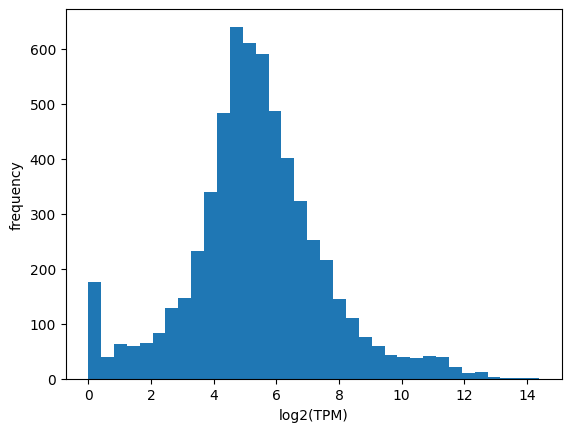

In [ ]:
x = log_tpm.iloc[:, 0]
fig = plt.figure()
ax = fig.add_subplot()
ax.hist(x, bins='scott')  # 階級の範囲の計算方法を指定する
ax.set_xlabel('log2(TPM)')
ax.set_ylabel('frequency')
fig.show()

次に、batch_1とbatch_2の遺伝子発現量で、散布図を描いてみる。

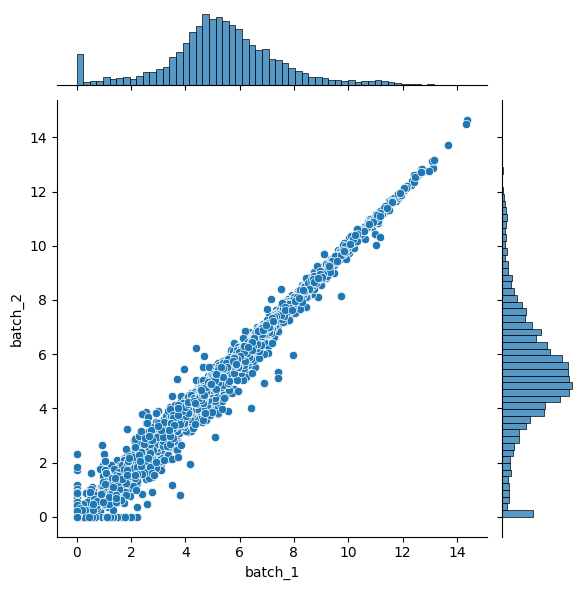

In [ ]:
import seaborn as sns
sns.jointplot(data=log_tpm, x = 'batch_1', y = 'batch_2')
plt.show()

コントロールサンプル間での比較なので、差は小さい。ちなみに、相関係数は

batch_1とchemostat_1の遺伝子発現量で、散布図を描いてみる。

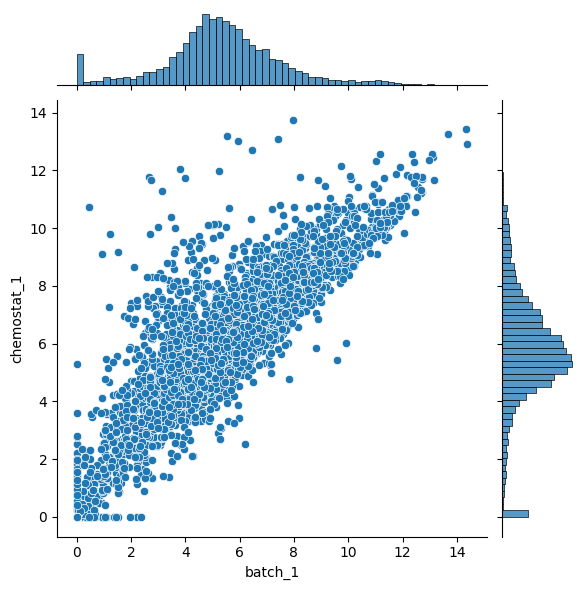

In [ ]:
sns.jointplot(data=log_tpm, x = 'batch_1', y = 'chemostat_1')
plt.show()

相関係数を計算してみる

In [ ]:
corr = log_tpm.corr()
print(corr)

              batch_1   batch_2   batch_3  chemostat_1  chemostat_2  \
batch_1      1.000000  0.991891  0.989675     0.868298     0.855021   
batch_2      0.991891  1.000000  0.994721     0.848379     0.833718   
batch_3      0.989675  0.994721  1.000000     0.843316     0.829421   
chemostat_1  0.868298  0.848379  0.843316     1.000000     0.990472   
chemostat_2  0.855021  0.833718  0.829421     0.990472     1.000000   
chemostat_3  0.859642  0.838742  0.835142     0.990262     0.993528   

             chemostat_3  
batch_1         0.859642  
batch_2         0.838742  
batch_3         0.835142  
chemostat_1     0.990262  
chemostat_2     0.993528  
chemostat_3     1.000000  


複数の変数間（batch_1とbatch_2、batch_1とbatch_3、etc.）の総当たりでヒストグラム付きの散布図を描いてみる

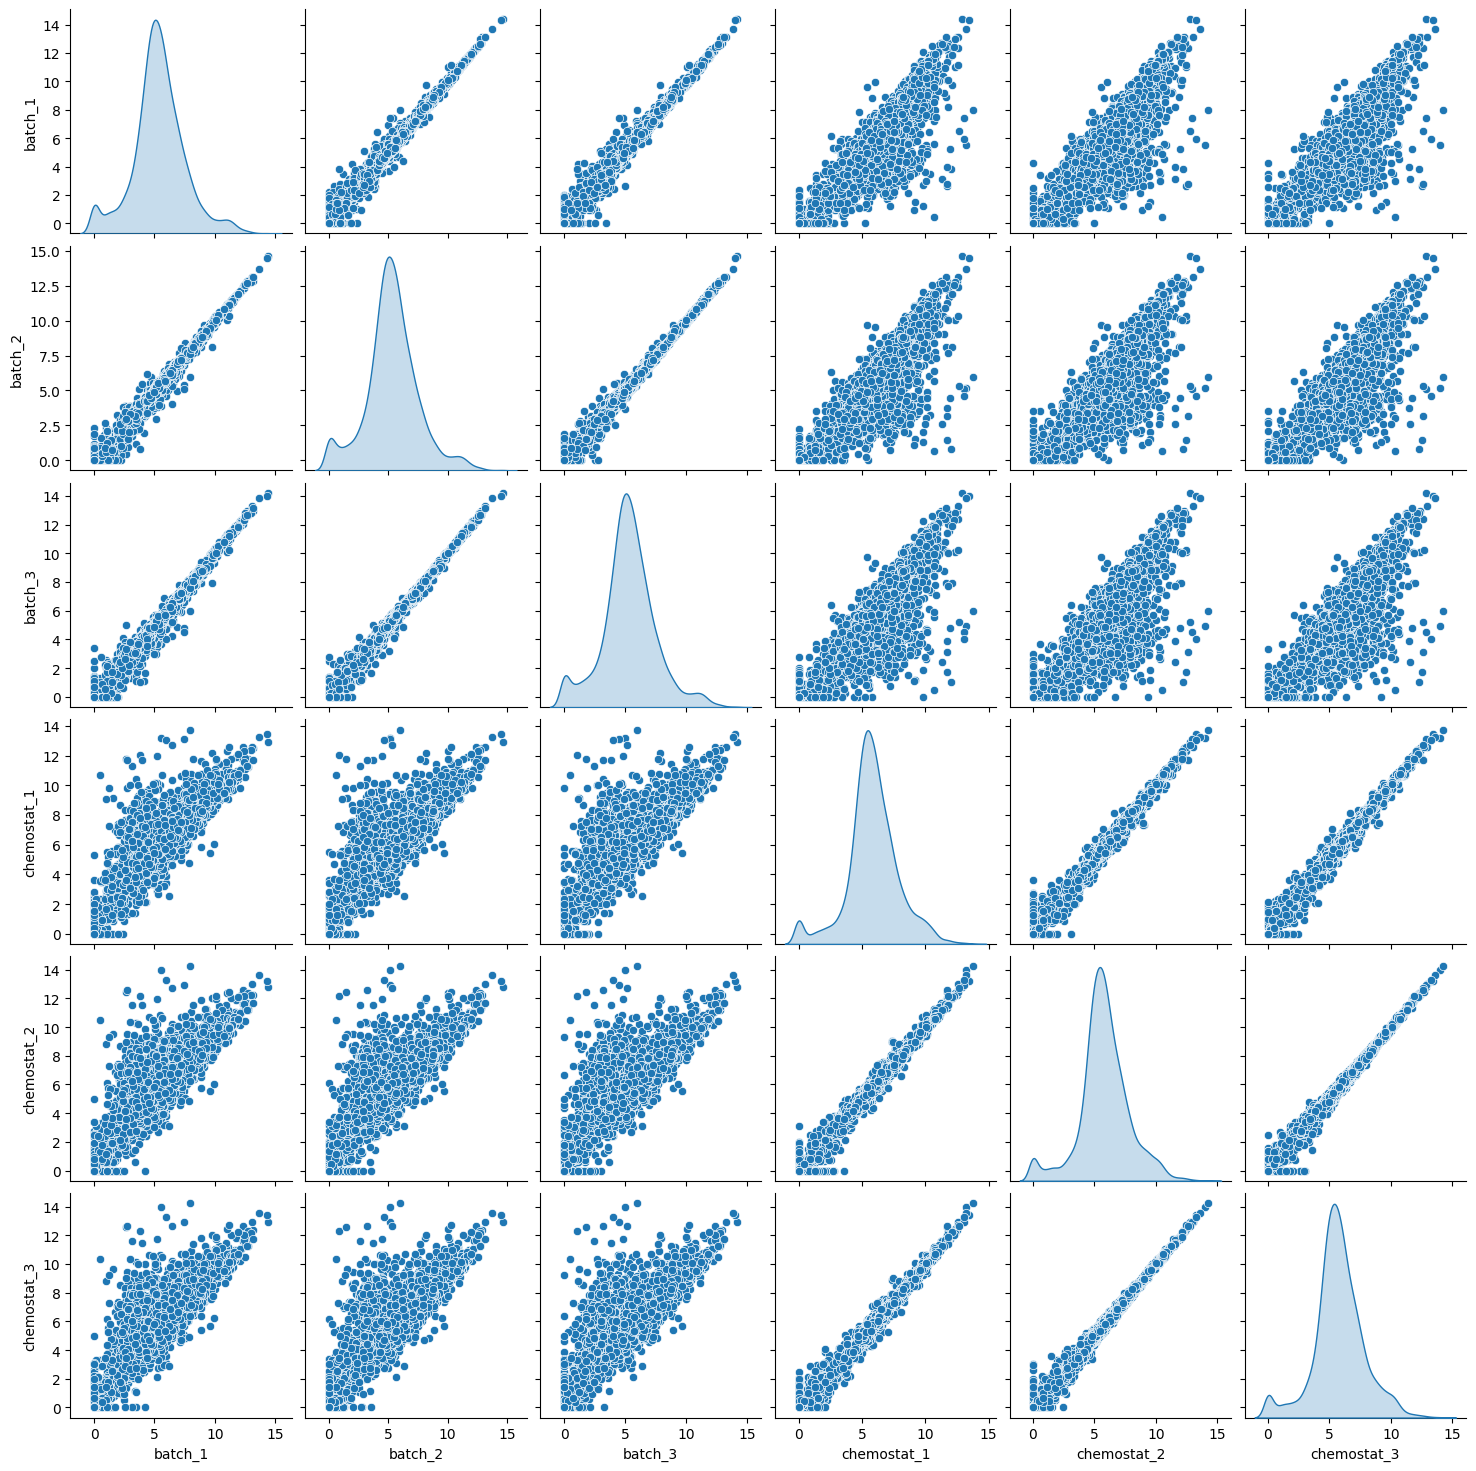

In [ ]:
sns.pairplot(log_tpm, diag_kind='kde') #diag_kind="kde"とすることで対角線に表示されるグラフの種類をカーネル密度推定に変更することができる。
plt.show()

各遺伝子におけるchemostatの平均値とbatchの平均値を散布図にすると、以下の通りである。

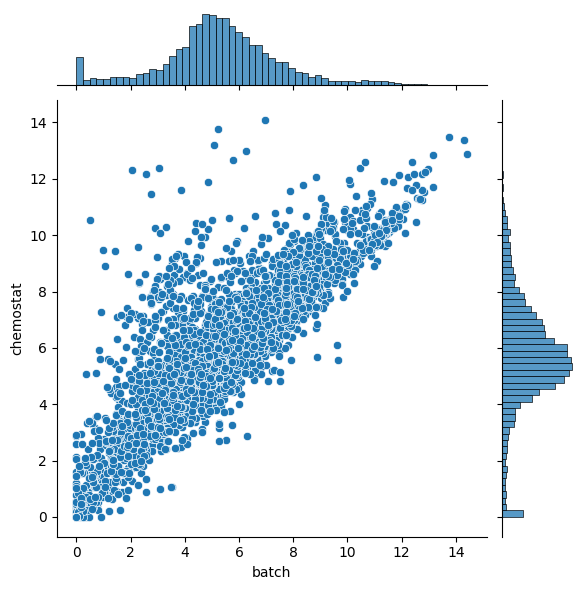

In [ ]:
batch_log_tpm_mean = np.log2(tpm.iloc[:, :3].mean(axis=1).values + 1)
chemostat_log_mean = np.log2(tpm.iloc[:, 3:].mean(axis=1).values + 1)

log_tpm_lib_mean = pd.DataFrame({'batch': batch_log_tpm_mean,
                                 'chemostat': chemostat_log_mean})

sns.jointplot(data=log_tpm_lib_mean, x = 'batch', y = 'chemostat')
plt.show()

アドバンス：
seabornのpairplotをカスタムして相関係数を表示する

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def draw_hist(x, **kws):
    plt.hist(x[~np.isnan(x)])

def corr_func(x, y, **kws):
    mask = ~np.logical_or(np.isnan(x), np.isnan(y))
    x, y = x[mask], y[mask]
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.3f}".format(r),
               xy=(.2, .5),
               xycoords=ax.transAxes,
               size=16)

def pairplot(df):
    g = sns.PairGrid(df, height=1.6, dropna=False)
    g.map_diag(draw_hist)
    g.map_upper(sns.regplot, scatter_kws={"s": 8}, line_kws={"color":  "r"})
    g.map_lower(corr_func)

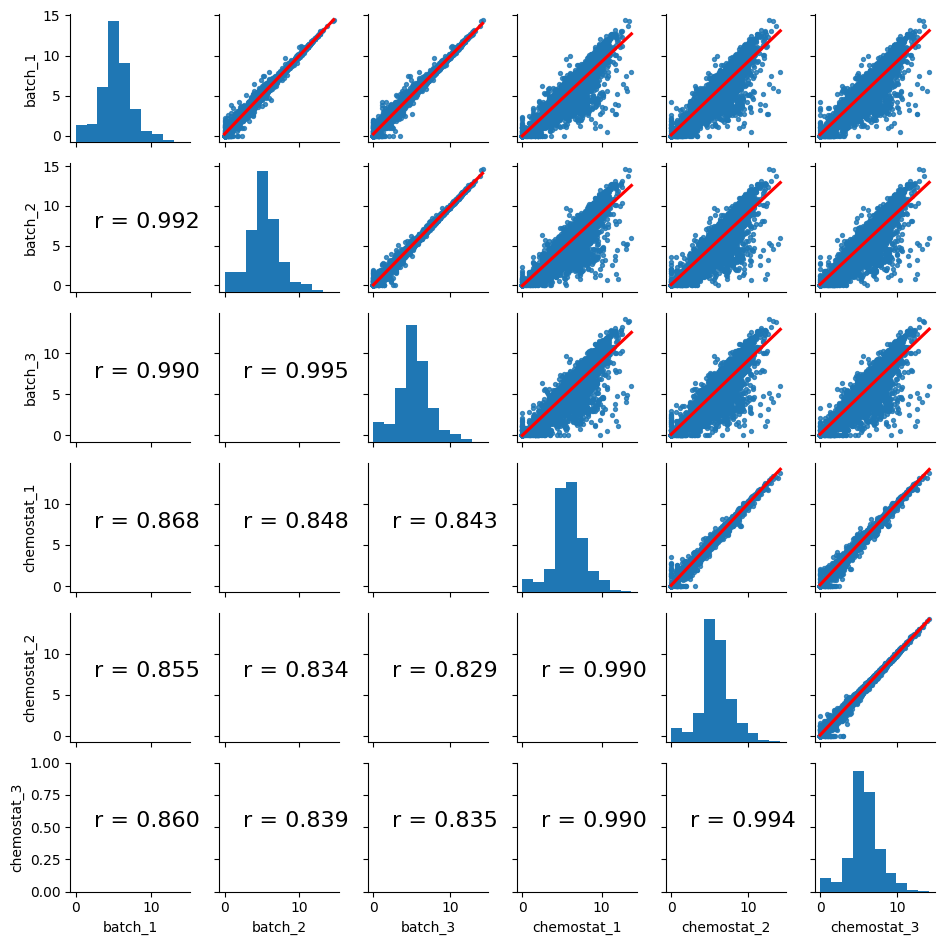

In [ ]:
pairplot(log_tpm)